In [1]:
include("../src/post_funcs.jl")

using CornerPlot

error: incorrect number of arguments
usage: julia run_mcmc.jl <sample number> <parameter config>


In [2]:
# example using the M18 sample velocity dispersion
chain, likevals = get_chain_likevals(2, 1, 75:100)

([-14.9468 -16.4515 … -15.0886 -16.1042; 2.54264 2.787 … 2.57017 2.73274; … ; 0.00882952 0.00893901 … -0.0179635 0.0114836; -0.0221973 -0.0206221 … -0.0334055 -0.0200055], [-454.625, -455.672, -2.51752e6, -2.51752e6, -464.983, -2.51752e6, -2.51752e6, -2.51752e6, -454.831, -2.51752e6  …  -454.811, -458.017, -452.988, -2959.45, -454.073, -455.116, -462.743, -466.272, -455.82, -452.186])

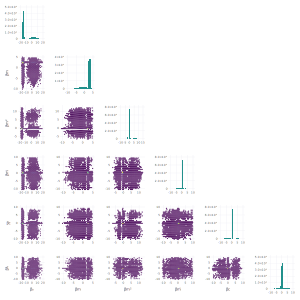

In [4]:
# M18 R_e posteriors
#corner(chain',
#       range=[(-20.0, 15.0), (-3.0, 3.0), (-0.1, 0.2), (-6.0, 2.0), (-1.0, 0.0), (-0.5, 0.5)])

# M18 surf posteriors
#corner(chain',
#       range=[(-35.0, 20.0), (0.0, 8.0), (-0.3, 0.1), (-2.5, 1.5), (-0.5, 0.5), (-0.3, 0.5)],
#       plotsize=30cm)

# M18 vdisp posteriors
#corner(chain',
#       range=[(-18.0, 14.0), (-5.0, 5.0), (-0.15, 0.15), (-2.5, 0.5), (-0.2, 0.6), (0.2, 0.6)],
#       varnames = ["β₀", "βm", "βm²", "βṁ", "βc", "βλ"],
#       plotsize=30cm)

# M19 R_e
#corner(chain',
#       range=[(-30.0, -15.0), (1.0, 3.0), (-0.1, -0.03), (1.0, 2.0), (0.0, 0.3), (0.0, 0.15)],
#       varnames = ["β₀", "βm", "βm²", "βṁ", "βc", "βλ"],
#       plotsize=30cm)

# M19 surf
#corner(chain',
#       range=[(-56.0, -46.0), (8.5, 10.2), (-10.5, -6.5), (1.15, 1.45), (-0.12, 0.02), (-0.06, 0.01)],
#       varnames = ["β₀", "βm", "βm²", "βṁ", "βc", "βλ"],
#       plotsize=30cm)

# M19 vdisp
corner(chain',
       range=[(-20.0, 20.0), (-10.0, 5.), (-6.5, 12.5), (-10.0, 10.0), (-10.0, 10.0), (-10.0, 10.0)],
       varnames = ["β₀", "βm", "βm²", "βṁ", "βc", "βλ"],
       plotsize=30cm)

In [ ]:
function walker_plot(chain, nwalkers)
    
    
    
end

In [45]:
function logprior(params, meanvars, varswitch)

    means = zeros(params)
    invvar = 0.04  # assume standard deviation of 5

    nvars = sum(varswitch)  # number of data variables
    logfac = -0.5 * log(2π * 25.0^(nvars * 6))

    for i in 1:nvars
        means[(6 * (i - 1) + 1)] = meanvars[Bool.(varswitch)][i]
    end

    return logfac - 0.5 * sum(invvar * (params .- means) .^ 2)

end


logprior (generic function with 1 method)

In [52]:
testpars = [50.6, 0, 100, 10, 0, 0, 21.2, 0, 0, 0, 0, 0]
logprior(testpars, [5.6, -3.2, 7.0], [1, 0, 1])

-266.7649934824139

In [5]:
repost = post_draw_ribbons(1, 4)

draw(SVG("finfigs/postribbons_M18_Re.svg", 4inch, 4inch), repost)
draw(PDF("finfigs/postribbons_M18_Re.pdf", 4inch, 4inch), repost)
draw(PNG("finfigs/postribbons_M18_Re.png", 4inch, 4inch), repost)
display("image/png", read("finfigs/postribbons_M18_Re.png"))

LoadError: [91mArgumentError: "/home/users/kww231/dev/cenquenbias/src/dat/mocks/M18_cenquen_mock.csv" is not a valid file[39m